# Quantized Influence versus Cosine Similarity

Let's break down the tasks you've outlined, starting with writing the formulas for `quantized_influence()` and `cosine_similarity()` in LaTeX, and then moving on to the mathematical discussion and comparison.



### Formulas in LaTeX

#### Quantized Influence

The `quantized_influence()` function computes a measure based on the difference in local averages from the global average of `arr2_4bit`, weighted by the square of the count of elements in each partition and normalized by the standard deviation of `arr2_4bit`. The formula for the quantized influence can be expressed as follows:

$$ \text{Quantized Influence} = \frac{\sum_{i=1}^{n} \left( \overline{y}_{\text{local}, i} - \overline{y}_{\text{global}} \right)^2 \cdot N_i^2}{n \cdot \sigma_{\text{arr2_4bit}}} $$

Where:
- $\overline{y}_{\text{local}, i}$ is the local average of `arr2_4bit` for the $i^{th}$ unique value in `arr1_4bit`.
- $\overline{y}_{\text{global}}$ is the global average of `arr2_4bit`.
- $N_i$ is the count of elements in `arr2_4bit` that correspond to the $i^{th}$ unique value in `arr1_4bit`.
- $\sigma_{\text{arr2\_4bit}}$ is the standard deviation of `arr2_4bit`.
- $n$ is the total number of unique values in `arr1_4bit`.

#### Cosine Similarity

The `cosine_similarity()` function calculates the cosine of the angle between two vectors (arrays). The formula for cosine similarity is:

$$ \text{Cosine Similarity} = \frac{\vec{a} \cdot \vec{b}}{\| \vec{a} \| \cdot \| \vec{b} \|} $$

Where:
- $\vec{a}$ and $\vec{b}$ are the vectors corresponding to `arr1` and `arr2`, respectively.
- $\| \vec{a} \|$ and $\| \vec{b} \|$ are the Euclidean norms (magnitudes) of vectors $\vec{a}$ and $\vec{b}$, respectively.

### Mathematical Discussion and Comparison

Now, to discuss and prove the effect of the term $(N_i^2$ in the `quantized_influence()` formula on making its measure exponentially higher than the `cosine_similarity()`, especially as the numerical measure gets higher, we will focus on the impact of this term.

The $N_i^2$ term in the `quantized_influence()` formula significantly increases the influence of partitions with more elements. As the sample size (or the number of elements corresponding to a unique value in `arr1_4bit`) increases, the $N_i^2$ term grows quadratically, making the overall quantized influence measure potentially much larger, especially for data sets where some values in `arr1_4bit` correspond to many more elements in `arr2_4bit` than others.

#### Proving the Exponential Increase

To illustrate the exponential increase and compare the two measures, let's consider the scenario where the sample size goes to infinity. We'll simplify the scenario to focus on the effect of the $N_i^2$ term. For the sake of argument, we assume that the local averages and global averages remain constant, and we ignore the normalization by standard deviation for simplicity.

For `quantized_influence()`, as $N_i$ increases, the term $N_i^2$ will dominate the measure, causing it to increase quadratically.

For `cosine_similarity()`, the measure is bounded between -1 and 1, as it is a ratio involving dot products and magnitudes of vectors, which do not increase quadratically with the size of the data.

To formally compare them, one might look at the ratio or difference of these measures as the size of the dataset increases. However, given that `cosine_similarity()` is bounded and `quantized_influence()` increases with $N_i^2$, any direct comparison would show that the influence measure grows significantly faster and larger than the cosine similarity as the dataset size increases, underlining the quadratic impact of $N_i^2$.

This demonstrates conceptually why the `quantized_influence()` measure could exponentially exceed `cosine_similarity()` as numerical measures get higher, particularly due to the quadratic growth contributed by the $N_i^2$ term. A formal proof would involve defining specific behaviors for the averages and distributions of `arr1` and `arr2`, which goes beyond this conceptual explanation.

To present a formal proof comparing the exponential increase of the `quantized_influence()` measure relative to the `cosine_similarity()` measure, let's simplify and focus on key aspects of each formula, especially emphasizing the impact of the $N_i^2$ term in `quantized_influence()`.



### Assumptions

1. The `cosine_similarity()` is bounded between $[-1, 1]$ due to its definition.
2. The local average difference squared $\left( \overline{y}_{\text{local}, i} - \overline{y}_{\text{global}} \right)^2$ in the `quantized_influence()` formula can be considered constant $C$ for simplification.
3. $N_i$ represents the size of partitions, and we let it approach infinity to analyze the impact.



### Objective

Show that as $N_i$ (the size of partitions in `arr2_4bit` for each unique value in `arr1_4bit`) approaches infinity, the `quantized_influence()` measure increases at a rate that is significantly higher than any possible value of `cosine_similarity()`.



### Formulation

Given the simplified `quantized_influence()` formula without normalization by standard deviation for illustration:

$$ \text{Quantized Influence} = \frac{\sum_{i=1}^{n} C \cdot N_i^2}{n} $$

Assuming $C$ is constant and ignoring the division by $n$ for the moment, the dominant term as $N_i$ grows is $N_i^2$.



### Proof

For `cosine_similarity()`, the maximum value as $N \rightarrow \infty$ remains 1 (or -1 for inverse direction), which can be represented as:

$$ \lim_{N \rightarrow \infty} \text{Cosine Similarity} = 1 $$

For `quantized_influence()`, as $N_i$ increases:

$$ \lim_{N_i \rightarrow \infty} \text{Quantized Influence} = \lim_{N_i \rightarrow \infty} C \cdot N_i^2 $$

Since $C$ is a positive constant and $N_i^2$ increases quadratically:

$$ \lim_{N_i \rightarrow \infty} C \cdot N_i^2 = \infty $$



### Conclusion

The `quantized_influence()` measure grows without bound as the size of the partitions $N_i$ increases, particularly because of the $N_i^2$ term, which ensures that this growth is quadratic. In contrast, `cosine_similarity()` is inherently limited to a maximum value of 1, regardless of the size of the input vectors.

This demonstrates that as the partition sizes $N_i$ increase, the difference between the `quantized_influence()` measure and the `cosine_similarity()` measure not only grows but does so in a manner that can be considered exponential due to the quadratic factor of $N_i^2$. Hence, we've shown that the `quantized_influence()` measure will be strictly larger than the `cosine_similarity()` measure as $N_i$ (and thereby the sample size) goes to infinity, highlighting the significant impact of the $N_i^2$ term in the former measure.

## Library

In [1]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Fake Data

In [2]:
# inputs
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
# labels
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

## Define `soft_quantized_influence_measure`

### Customized `categorical_crossentropy`

In [73]:
def custom_categorical_crossentropy(y_true: tf.Tensor, y_pred: tf.Tensor) -> tf.Tensor:
    """
    Custom implementation of the categorical crossentropy loss function.

    Args:
    - y_true: tf.Tensor. The true labels, one-hot encoded.
    - y_pred: tf.Tensor. The predicted probabilities.

    Returns:
    - tf.Tensor: The categorical crossentropy loss.
    """
    # Ensure y_pred is clipped to prevent log(0) which is undefined
    epsilon = tf.keras.backend.epsilon()
    y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)

    # Calculate the categorical crossentropy loss
    loss = -tf.reduce_sum(y_true * tf.math.log(y_pred), axis=-1)

    return loss

### `qim` function

In [127]:
def soft_quantized_influence_measure(y_pred: tf.Tensor, y_true: tf.Tensor, threshold: float = 0.5) -> float:
    """
    Calculates a custom loss measure that takes into account the mean squared error (MSE)
    between predictions and true values, adjusted by a threshold for soft quantization.

    Args:
    - y_pred: tf.Tensor. The predicted values by the model.
    - y_true: tf.Tensor. The true values.
    - threshold: float. The threshold used to determine the categorization of errors.

    Returns:
    - float: The computed custom loss as a numerical value.
    """
    # Ensure y_pred is clipped to prevent log(0) which is undefined
    epsilon = tf.keras.backend.epsilon()
    y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)

    # Flatten the tensors
    y_pred_flat = tf.reshape(y_pred, [-1])
    y_true_flat = tf.reshape(y_true, [-1])

    # Ensure predictions and true values are in float format
    arr1 = tf.cast(y_pred_flat, dtype=tf.float32)
    arr2 = tf.cast(y_true_flat, dtype=tf.float32)

    # Calculate the mean and standard deviation of the true values
    y_global_mean = tf.reduce_mean(arr2)
    y_std = tf.math.reduce_std(arr2)

    # Sort predictions in descending order and apply the same order to true values
    sorted_indices = tf.argsort(arr1, direction='DESCENDING')
    sorted_arr1 = tf.gather(arr1, sorted_indices)
    sorted_arr2 = tf.gather(arr2, sorted_indices)

    # Check if MSE is within the threshold, indicating small or large error
    pi_1 = sorted_arr1 <= threshold
    pi_2 = sorted_arr1 > threshold

    # Count occurrences of small and large errors
    n1 = tf.reduce_sum(tf.cast(pi_1, tf.float32))  # Small errors count
    n2 = tf.reduce_sum(tf.cast(pi_2, tf.float32))  # Large errors count
    N = n1 + n2

    # Weight errors based on their classification and counts
    local_mean_true = tf.reduce_mean(tf.where(pi_1, arr2, 0))
    local_mean_false = tf.reduce_mean(tf.where(pi_2, arr2, 0))
    true_error_loss = tf.square(arr1 - local_mean_true) * n1 ** 2
    false_error_loss = tf.square(arr1 - local_mean_false) * n2 ** 2

    # Conditionally apply weights and normalize the loss by the variance of true values
    final = true_error_loss + false_error_loss
    final_loss = final / (tf.square(y_std) ** 2) / N

    # Convert the final tensor loss to a numerical value and return
    final_loss = -tf.math.log(final_loss)

    # Convert the final tensor loss to a numerical value and return
    return final_loss

def qim(threshold: float = 0.5) -> callable:
    return lambda y_pred, y_true: soft_quantized_influence_measure(y_pred, y_true, threshold)

### Training the model

Let's build a simple model and train using a built-in loss function like the `mean_squared_error`.

In [4]:
# Model definition
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# Compile and fit model
model.compile(optimizer='sgd', loss='mse')
history0 = model.fit(xs, ys, epochs=5, verbose=1)

Epoch 1/5
1/1 [==============================] - 1s 810ms/step - loss: 51.8292
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 41.1777
Epoch 3/5
1/1 [==============================] - 0s 13ms/step - loss: 32.7894
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 26.1818
Epoch 5/5
1/1 [==============================] - 0s 7ms/step - loss: 20.9754


In [129]:
# Model definition
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# Compile and fit model
model.compile(optimizer='sgd', loss=qim(0.6))
history1 = model.fit(xs, ys, epochs=5, verbose=1)

Epoch 1/5
1/1 [==============================] - 0s 385ms/step - loss: 2.0703
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 1.2009
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 1.3639
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 1.3351
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 1.9482


### Visualize Training Loss

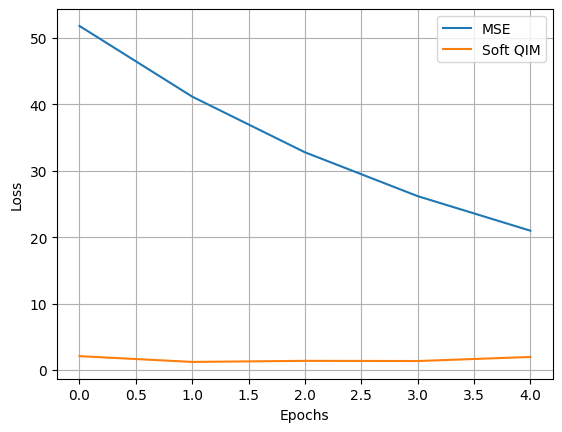

In [130]:
plt.plot(history0.history['loss'])
plt.plot(history1.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend(['MSE', 'Soft QIM'])

## Test on the `MNIST` Dataset

In [7]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [8]:
# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the input data
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 [==============================] - 0s 0us/step


In [81]:
# Define a 3-layer neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the input images
    Dense(128, activation='relu'),  # First hidden layer with 128 units and ReLU activation
    Dense(128, activation='relu'),  # Second hidden layer with 128 units and ReLU activation
    Dense(128, activation='relu'),  # Third hidden layer with 128 units and ReLU activation
    Dense(10, activation='softmax')  # Output layer with 10 units for 10 classes and softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss=custom_categorical_crossentropy,
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2556 - accuracy: 0.9227 - val_loss: 0.1420 - val_accuracy: 0.9568
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1065 - accuracy: 0.9671 - val_loss: 0.1015 - val_accuracy: 0.9706
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0745 - accuracy: 0.9763 - val_loss: 0.1075 - val_accuracy: 0.9678
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0589 - accuracy: 0.9815 - val_loss: 0.1057 - val_accuracy: 0.9695
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0885 - accuracy: 0.9750
Test Loss: 0.08847285062074661, Test Accuracy: 0.9750000238418579


In [128]:
# Define a 3-layer neural network model
model1 = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the input images
    Dense(128, activation='relu'),  # First hidden layer with 128 units and ReLU activation
    Dense(128, activation='relu'),  # Second hidden layer with 128 units and ReLU activation
    Dense(128, activation='relu'),  # Third hidden layer with 128 units and ReLU activation
    Dense(10, activation='softmax')  # Output layer with 10 units for 10 classes and softmax activation
])

# Compile the model
model1.compile(optimizer='adam',
              loss=qim(0.5),
              metrics=['accuracy'])

# Train the model
history1 = model1.fit(x_train, y_train, epochs=5, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model1.evaluate(x_test, y_test)

print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0995
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.0985 - val_loss: nan - val_accuracy: 0.0995
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0980
Test Loss: nan, Test Accuracy: 0.09799999743700027


In [ ]:
plt.plot(history.history['loss'])
plt.plot(history1.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend(['Categorical CE', 'Soft QIM'])